Taller De Credit Fraud Detection

In [3]:
import sys
import time

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import HTML

# sys.path.append("code/.")

#import mglearn
from IPython.display import display
#from plotting_functions import *


# Preprocessing and pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import reciprocal

# train test split and cross validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PolynomialFeatures,
)
# pd.set_option("display.max_colwidth", 200)

In [5]:
#Cargamos los datos y procesamos algunas columnas
df = pd.read_csv('creditcard_2023.csv')

#Dado el tamangio del data set se deben eliminar unas columnas y filas repetidas para agilizar el modelamiento
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Get the correlation of each feature with the "Class" column
correlation_with_class = correlation_matrix["Class"].sort_values(ascending=False)

# Plot a heatmap of the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
# plt.title("Correlation Matrix Heatmap")
# plt.show()
# Print the correlations with the "Class" column
#print("Correlation with Class:\n", correlation_with_class)

# Drop any rows that are completely duplicated
df = df.drop_duplicates()

# Print the total number of transactions
print("Total number of transactions:", df.shape[0])
# Print the number of fraudulent transactions
print("Number of fraudulent transactions:", df[df['Class'] == 1].shape[0])
# Print the number of good transactions
print("Number of good transactions:", df[df['Class'] == 0].shape[0])

# Selecting columns where absolute correlation with 'Class' is higher than 0.4
relevant_features = correlation_with_class[correlation_with_class.abs() > 0.4].index
# Dataframe with only relevant features
df_corr = df[relevant_features]

df_corr.to_csv('filtered_creditcard_2023.csv', index=False)
# print(df.head())

#Se elimina la columna de ID
df_corr.drop(columns=['id'], inplace=True)

columns_to_consider = [col for col in df_corr.columns if col not in ['Amount', 'Class']]

# Drop duplicates, considering only the columns in 'columns_to_consider'
df_corr.drop_duplicates(subset=columns_to_consider, inplace=True)

# Print the total number of transactions
print("Total number of transactions after drop:", df_corr.shape[0])
# Print the number of fraudulent transactions
print("Number of fraudulent transactions after drop:", df_corr[df_corr['Class'] == 1].shape[0])
# Print the number of good transactions
print("Number of good transactions after drop:", df_corr[df_corr['Class'] == 0].shape[0])

print(df_corr.describe)

Total number of transactions: 568630
Number of fraudulent transactions: 284315
Number of good transactions: 284315


C:\Users\sebas\AppData\Local\Temp\ipykernel_15500\1641488914.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr.drop(columns=['id'], inplace=True)


Total number of transactions after drop: 552035
Number of fraudulent transactions after drop: 276845
Number of good transactions after drop: 275190
<bound method NDFrame.describe of         Class        V4       V11        V2       V18        V6       V17  \
0           0 -0.083724 -0.987020 -0.469648  0.333644  0.732898  0.512307   
1           0 -0.429654  0.140107 -0.356045  0.201799  0.428605  0.403810   
2           0 -0.457986 -0.272985 -0.949385  0.239442  1.419481  0.886526   
3           0 -1.090178 -0.752581 -0.508959  2.178616  1.143312  0.242629   
4           0 -0.448293 -1.203171 -0.165280  0.291782  0.530549  0.366466   
...       ...       ...       ...       ...       ...       ...       ...   
568625      1  0.904227  1.430971  0.061886 -1.376970  0.481454 -1.520928   
568626      1 -0.267328  0.173590 -0.202896 -0.664313  0.237148 -0.575991   
568627      1 -0.035893  0.477582 -0.004095 -0.251679  0.121098 -0.729002   
568628      1 -0.144480 -0.324934 -0.516970  0.9

C:\Users\sebas\AppData\Local\Temp\ipykernel_15500\1641488914.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr.drop_duplicates(subset=columns_to_consider, inplace=True)


In [3]:
#Separar los datos en entrenamiento, validación y test
train_df, test_df = train_test_split(df_corr, test_size=0.2, random_state=1)

#Definir características y variable objetivo
X_train = train_df.drop(columns=["Class"])
y_train = train_df["Class"]

X_test = test_df.drop(columns=["Class"])
y_test = test_df["Class"]

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Modelo regresión logística
Accuracy: 0.9633990598422202
Precision: 0.9786967418546366
Recall: 0.947455141320683
F1 Score: 0.9628225769354617
Best Parameters: {'classifier__C': 46.41588833612773, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Confusion Matrix:
[[54039  1139]
 [ 2902 52327]]


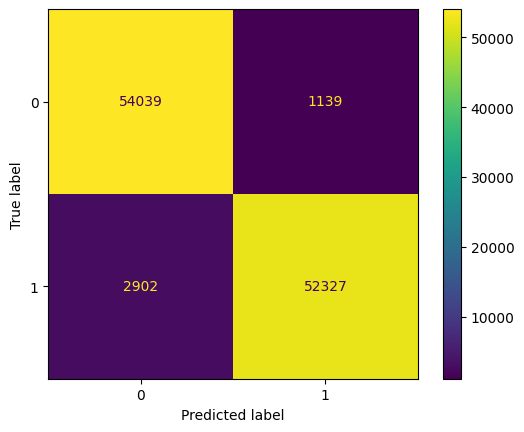

In [4]:
#Definimos el clasificador base
logreg_base = LogisticRegression()
clf_logreg = Pipeline(steps=[("classifier", logreg_base)])

param_grid = {
    'classifier__solver': ['lbfgs', 'saga'],
    'classifier__C': np.logspace(-3, 3, 10),
    'classifier__penalty': ['l2'],  
}

search_logreg = GridSearchCV(clf_logreg, param_grid, scoring='accuracy', n_jobs=1)

search_logreg.fit(X_train, y_train)

#Se predicen las classes usando el DF de test
y_pred = search_logreg.predict(X_test)

#Se calculan las metricas de evalucacion 
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred)

# Obtengamos el accuracy para la regresión logística
print('Modelo regresión logística')
print(f'Accuracy: {search_logreg.score(X_test, y_test)}')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f'Best Parameters: {search_logreg.best_params_}')

print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Modelo regresión logística
Accuracy: 0.9932341246478937
Precision: 0.9924971073184843
Recall: 0.9939886653750747
F1 Score: 0.9932423263766386
Best Parameters: {'classifier__C': 1000.0, 'classifier__solver': 'lbfgs', 'poly__degree': 3}
Confusion Matrix:
[[54763   415]
 [  332 54897]]


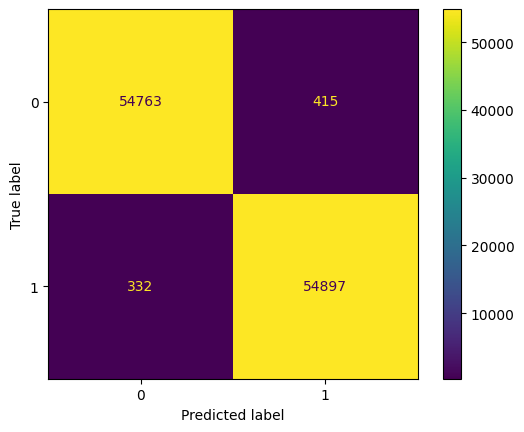

In [5]:
#Definimos el clasificador de caracteristicas polynomicas
logreg_base = LogisticRegression()
clf_logreg = Pipeline(steps=[('poly', PolynomialFeatures()), ("classifier", logreg_base)])

param_grid = {
    'poly__degree': list(range(2, 4)),
    'classifier__solver': ['lbfgs', 'saga'],
    'classifier__C': np.logspace(-3, 3, 10),
}

search_logreg = GridSearchCV(clf_logreg, param_grid, scoring='accuracy', n_jobs=1)

search_logreg.fit(X_train, y_train)

#Se predicen las classes usando el DF de test
y_pred = search_logreg.predict(X_test)

#Se calculan las metricas de evalucacion 
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred)

# Obtengamos el accuracy para la regresión logística
print('Modelo regresión logística')
print(f'Accuracy: {search_logreg.score(X_test, y_test)}')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f'Best Parameters: {search_logreg.best_params_}')

print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()